<a href="https://colab.research.google.com/github/DILSHAN565/FYP_DL_Models/blob/main/Copy_of_Mobilenetv2_m_16expand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

# Define the path to the directory containing your dataset
directory_path = '/content/drive/My Drive/progress/Tea-Leaf-Diseases-Dataset'

# List all files in the directory
files = os.listdir(directory_path)

# Print the list of files
print(files)

['validation', 'train', 'test', 'valid']


In [ ]:
!pip -q install vit_keras tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 4.1 MB/s eta 0:00:00


In [ ]:
!pip -q install --upgrade --no-cache-dir gdown

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from vit_keras import vit
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
tf.get_logger().setLevel('ERROR')

In [ ]:
import os
import cv2
import random
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from termcolor import colored
import matplotlib.pyplot as plt
from keras.utils import plot_model
from tensorflow.keras import optimizers
from tensorflow.keras import models, layers
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import os

# Define the path to the directory containing your dataset
directory_path = '/content/drive/My Drive/progress/Tea-Leaf-Diseases-Dataset'

# List all files in the directory
files = os.listdir(directory_path)

# Print the list of files
print(files)

['validation', 'train', 'test', 'valid']


In [ ]:
SEED = 42
np.random.seed(SEED)


In [ ]:
IMAGE_SIZE = 224
BATCH_SIZE = 8
EPOCHS = 200
LEARNING_RATE = 1e-4

In [ ]:
# Insert the Dataset path here
train_path = '/content/drive/MyDrive/progress/Tea-Leaf-Diseases-Dataset/train'
val_path = '/content/drive/MyDrive/progress/Tea-Leaf-Diseases-Dataset/validation'
test_path = '/content/drive/MyDrive/progress/Tea-Leaf-Diseases-Dataset/test'

In [ ]:
def num_of_classes(folder_dir, folder_name) :
    classes = [class_name for class_name in os.listdir(train_path)]
    print(colored(f'number of classes in {folder_name} folder : {len(classes)}', 'blue', attrs=['bold']))

In [ ]:
num_of_classes(train_path, 'train')
num_of_classes(val_path, 'validation')
num_of_classes(test_path, 'test')

number of classes in train folder : 8
number of classes in validation folder : 8
number of classes in test folder : 8


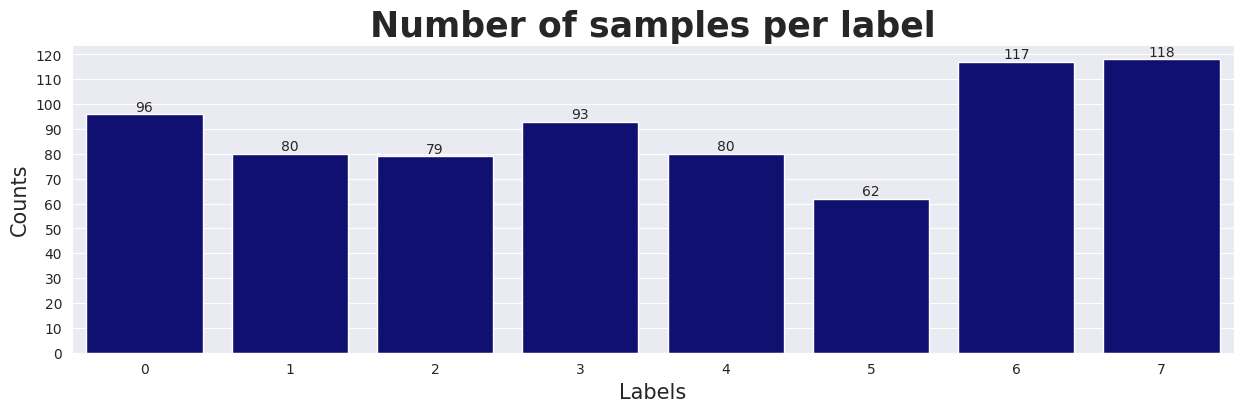

In [ ]:
# Get the class names and the number of samples in each class
classes = [class_name for class_name in os.listdir(train_path)]
count = [len(os.listdir(os.path.join(train_path, class_name))) for class_name in classes]

# Convert class names to integers if they are in string format and sort them
sorted_classes = sorted(classes, key=int)
sorted_count = [count[classes.index(class_name)] for class_name in sorted_classes]

# Plot the sorted class counts
plt.figure(figsize=(15, 4))
ax = sns.barplot(x=sorted_classes, y=sorted_count, color='navy')
plt.xticks(rotation=0)  # No rotation needed if class names are integers
for container in ax.containers:
    ax.bar_label(container)
plt.title('Number of samples per label', fontsize=25, fontweight='bold')
plt.xlabel('Labels', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.yticks(np.arange(0, max(sorted_count) + 10, 10))
plt.show()

In [ ]:
# A function to return DataFrame

def create_df(folder_path) :
    all_images = []
    for class_name in classes :
        class_path = os.path.join(folder_path, class_name)
        all_images.extend([(os.path.join(class_path, file_name), class_name) for file_name in os.listdir(class_path)])
    df = pd.DataFrame(all_images, columns=['file_path', 'label'])
    return df

In [ ]:
train_df = create_df(train_path)
validation_df = create_df(val_path)
test_df = create_df(test_path)

In [ ]:
print(colored(f'Number of samples in train : {len(train_df)}', 'blue', attrs=['bold']))
print(colored(f'Number of samples in validation : {len(validation_df)}', 'blue', attrs=['bold']))
print(colored(f'Number of samples test : {len(test_df)}', 'blue', attrs=['bold']))

Number of samples in train : 725
Number of samples in validation : 82
Number of samples test : 83


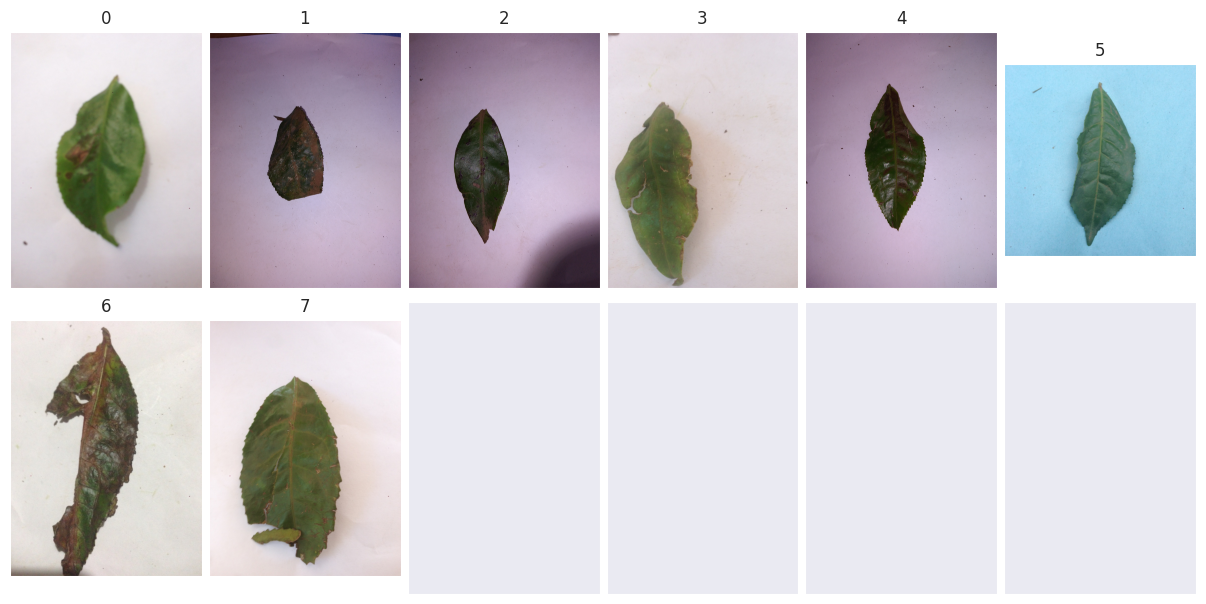

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Assuming train_df is already defined and contains the necessary data
# Ensure the classes are sorted
train_df_sorted = train_df.copy()
train_df_sorted['label'] = train_df_sorted['label'].astype(int)  # Convert labels to integers if needed
train_df_sorted = train_df_sorted.sort_values(by='label').reset_index(drop=True)

# Create a DataFrame with one Label of each category
df_unique = train_df_sorted.drop_duplicates(subset=["label"]).reset_index(drop=True)

# Display some pictures of the dataset
fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(12, 6), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    if i < len(df_unique):  # Check if index is within the DataFrame length
        img = plt.imread(df_unique.file_path[i])
        ax.imshow(img)
        ax.set_title(df_unique.label[i], fontsize=12)
plt.tight_layout(pad=0.5)
plt.show()


In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input



In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Create ImageDataGenerators for train, validation, and test sets with MobileNetV2 preprocessing
train_batches = ImageDataGenerator(
    preprocessing_function=preprocess_input
).flow_from_directory(
    directory=train_path,
    target_size=(224, 224),
    batch_size=10,
    shuffle=True  # Shuffle train data
)

valid_batches = ImageDataGenerator(
    preprocessing_function=preprocess_input
).flow_from_directory(
    directory=val_path,
    target_size=(224, 224),
    batch_size=10,
    shuffle=False  # Don't shuffle validation data
)

test_batches = ImageDataGenerator(
    preprocessing_function=preprocess_input
).flow_from_directory(
    directory=test_path,
    target_size=(224, 224),
    batch_size=10,
    shuffle=False  # Don't shuffle test data
)


Found 725 images belonging to 8 classes.
Found 82 images belonging to 8 classes.
Found 83 images belonging to 8 classes.


In [ ]:
pre_trained_model = MobileNetV2(
    input_shape=(224, 224, 3),            # Input image size
    include_top=False,                    # model not include top layer
    weights='imagenet',                   # weights type
    pooling='avg'                         # type of pooling layer
)

9406464/9406464 [==============================] - 1s 0us/step


In [ ]:
# Name of layers in MobileNetV2
for layer in pre_trained_model.layers :
    print(layer.name)

input_1
Conv1
bn_Conv1
Conv1_relu
expanded_conv_depthwise
expanded_conv_depthwise_BN
expanded_conv_depthwise_relu
expanded_conv_project
expanded_conv_project_BN
block_1_expand
block_1_expand_BN
block_1_expand_relu
block_1_pad
block_1_depthwise
block_1_depthwise_BN
block_1_depthwise_relu
block_1_project
block_1_project_BN
block_2_expand
block_2_expand_BN
block_2_expand_relu
block_2_depthwise
block_2_depthwise_BN
block_2_depthwise_relu
block_2_project
block_2_project_BN
block_2_add
block_3_expand
block_3_expand_BN
block_3_expand_relu
block_3_pad
block_3_depthwise
block_3_depthwise_BN
block_3_depthwise_relu
block_3_project
block_3_project_BN
block_4_expand
block_4_expand_BN
block_4_expand_relu
block_4_depthwise
block_4_depthwise_BN
block_4_depthwise_relu
block_4_project
block_4_project_BN
block_4_add
block_5_expand
block_5_expand_BN
block_5_expand_relu
block_5_depthwise
block_5_depthwise_BN
block_5_depthwise_relu
block_5_project
block_5_project_BN
block_5_add
block_6_expand
block_6_expand

In [ ]:
# Freeze all layers, except last layer
# The goal is to train just last layer of pre trained model
from tensorflow.keras.models import Model
pre_trained_model.trainable = True
set_trainable = False

for layer in pre_trained_model.layers :
    if layer.name == 'block_16_expand' :
        set_trainable = True
    if set_trainable :
        layer.trainable = True
    else :
        layer.trainable = False

In [ ]:
# Add custom layers on top of the base model
model = models.Sequential()
model.add(pre_trained_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(8, activation='softmax'))

In [ ]:
# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 1280)              2257984   
 tional)                                                         
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 256)               327936    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 8)                 1032      
                                                                 
Total params: 2619848 (9.99 MB)
Trainable params: 1247944 (4.76 MB)
Non-trainable params: 1371904 (5.23 MB)
______________

In [ ]:
import os
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, CSVLogger

In [ ]:
 model.compile(optimizer=Adam(learning_rate=LEARNING_RATE),
                  loss=tf.keras.losses.CategoricalCrossentropy(),
                  metrics=[tf.keras.metrics.CategoricalAccuracy()])


In [ ]:
#Define the directory for saving model artifacts
save_dir = '/content/drive/MyDrive/progress/VIT-high-2-Mobilenetv2-16expand-archi'

In [ ]:
# Ensure the base directory exists
os.makedirs(save_dir, exist_ok=True)

In [ ]:
# Specific directory for saving weights
weights_dir = os.path.join(save_dir, 'weights')
os.makedirs(weights_dir, exist_ok=True)


In [ ]:
# Directory for logging CSV data
logs_dir = os.path.join(save_dir, 'logs')
os.makedirs(logs_dir, exist_ok=True)

In [ ]:
# ModelCheckpoint: Save the best model weights
model_checkpoint_callback = ModelCheckpoint(
    filepath=os.path.join(weights_dir, 'ViT_weights-{epoch:02d}.h5'),
    save_weights_only=True,
    monitor='val_loss',  # Change to 'val_loss' if you want to monitor validation loss instead
    mode='min',  # Use 'min' if monitoring 'val_loss'
    save_best_only=True,
    verbose=1
)

In [ ]:
# ReduceLROnPlateau: Reduce learning rate when a metric has stopped improving
reduce_lr_callback = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=5,
    verbose=1
)

In [ ]:
# CSVLogger: Log training data into a CSV file
csv_logger_callback = CSVLogger(
    os.path.join(logs_dir, 'training_log.csv')
)

In [ ]:
# EarlyStopping: Stop training when a monitored metric has stopped improving
early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=20,
    verbose=1,
    restore_best_weights=True
)


In [ ]:
# Combine all callbacks
callbacks = [
    model_checkpoint_callback,
    reduce_lr_callback,
    csv_logger_callback,
    early_stopping_callback,
    # Assuming metric_callback is defined elsewhere in your code
    # metric_callback
]

In [ ]:
# Now, you can use this `callbacks` list when fitting your model
history = model.fit(
    train_batches,
    validation_data=valid_batches,
    epochs=100,
    steps_per_epoch=len(train_batches),
    validation_steps=len(valid_batches),
    callbacks=callbacks
)

Epoch 1/100
73/73 [==============================] - ETA: 0s - loss: 1.2533 - categorical_accuracy: 0.5503
Epoch 1: val_loss improved from inf to 1.36889, saving model to /content/drive/MyDrive/progress/VIT-high-2-Mobilenetv2-16expand-archi/weights/ViT_weights-01.h5
73/73 [==============================] - 437s 6s/step - loss: 1.2533 - categorical_accuracy: 0.5503 - val_loss: 1.3689 - val_categorical_accuracy: 0.4268 - lr: 1.0000e-04
Epoch 2/100
73/73 [==============================] - ETA: 0s - loss: 0.5225 - categorical_accuracy: 0.8593
Epoch 2: val_loss improved from 1.36889 to 0.84135, saving model to /content/drive/MyDrive/progress/VIT-high-2-Mobilenetv2-16expand-archi/weights/ViT_weights-02.h5
73/73 [==============================] - 87s 1s/step - loss: 0.5225 - categorical_accuracy: 0.8593 - val_loss: 0.8413 - val_categorical_accuracy: 0.6951 - lr: 1.0000e-04
Epoch 3/100
73/73 [==============================] - ETA: 0s - loss: 0.2794 - categorical_accuracy: 0.9200
Epoch 3: val_l

In [ ]:
import matplotlib.pyplot as plt

def plot_accuracy(history, title):
    plt.title(title)
    plt.plot(history.history['categorical_accuracy'])
    plt.plot(history.history['val_categorical_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.ylim(0, 1)
    plt.legend(['train_accuracy', 'val_accuracy'], loc='best')
    plt.show()

def plot_loss(history, title):
    plt.title(title)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.ylim(0, 1)
    plt.legend(['train_loss', 'val_loss'], loc='best')
    plt.show()


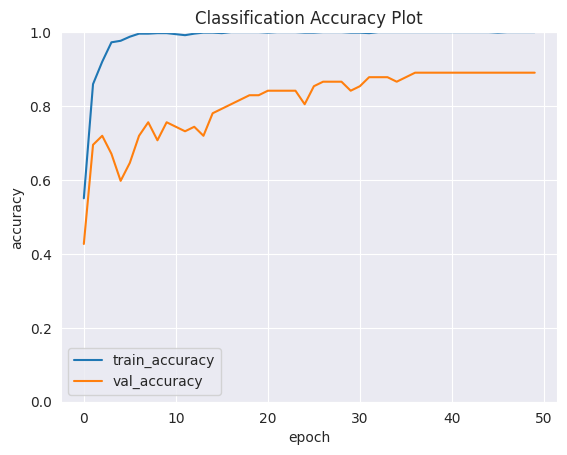

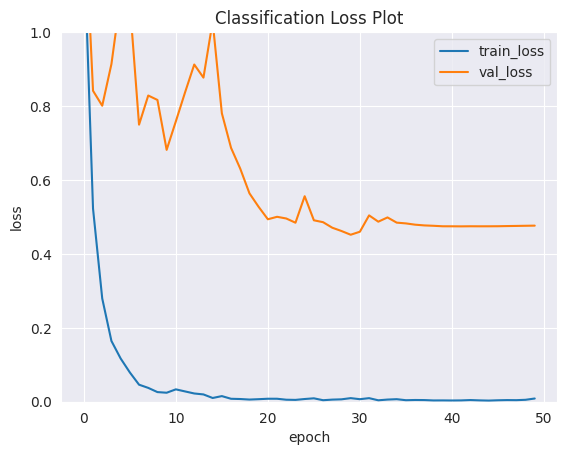

In [ ]:
plot_accuracy(history, 'Classification Accuracy Plot')
plot_loss(history, 'Classification Loss Plot')

In [ ]:

model.load_weights('/content/drive/MyDrive/progress/VIT-high-2-Mobilenetv2-16expand-archi/weights/ViT_weights-30.h5')


In [ ]:
# Assume the model.predict() call returns a predictions object
predictions = model.predict(test_batches, verbose=0)

# Getting the index of the highest probability class per image
y_pred = np.argmax(predictions, axis=1)

# Getting the true labels per image
y_true = test_batches.classes

# Getting the class names (labels) from the generator
class_names = list(test_batches.class_indices.keys())

# Printing the classification report
report = classification_report(y_true, y_pred, target_names=class_names)
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       0.86      0.60      0.71        10
           2       0.62      0.91      0.74        11
           3       0.90      0.90      0.90        10
           4       1.00      0.80      0.89        10
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00        12
           7       0.91      0.83      0.87        12

    accuracy                           0.87        83
   macro avg       0.89      0.87      0.87        83
weighted avg       0.89      0.87      0.87        83



In [ ]:
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

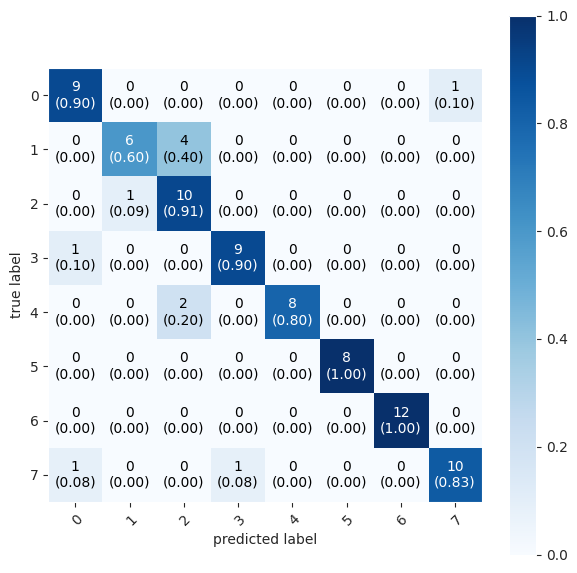

In [ ]:
# Compute confusion matrix
cm = metrics.confusion_matrix(y_true, y_pred)

# Plot the confusion matrix using mlxtend's `plot_confusion_matrix`
figure, ax = plot_confusion_matrix(conf_mat=cm,
                                   show_absolute=True,
                                   show_normed=True,
                                   colorbar=True,
                                   class_names=class_names,
                                   figsize=(7, 7))
plt.show()

In [ ]:
# Convert resutl of training to a DataFrame
result_df = pd.DataFrame(history.history)
result_df.tail()

,loss,categorical_accuracy,val_loss,val_categorical_accuracy,lr
45,0.003930,0.998621,0.474808,0.890244,1.000000e-08
46,0.004442,1.000000,0.475270,0.890244,1.000000e-08
47,0.004226,1.000000,0.475622,0.890244,1.000000e-08
48,0.005212,1.000000,0.476042,0.890244,1.000000e-08
49,0.008686,1.000000,0.476410,0.890244,1.000000e-08
